In [15]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import loompy as lp
# from MulticoreTSNE import MulticoreTSNE as TSNE

In [16]:
data = pd.read_csv("./data/PBMC-A/data.csv", index_col=0)
y_pre = pd.read_csv("./cluster_PBMC-A.csv", index_col=0)
label = pd.read_csv("./data/PBMC-A/label.csv", index_col=0)

In [17]:
y_pre.shape

(11432, 1)

In [18]:
label.shape

(11432, 1)

In [19]:
adata = sc.AnnData(data)

D:\Anaconda3\envs\cell2cell\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


In [20]:
adata

AnnData object with n_obs × n_vars = 11432 × 14504

In [ ]:
nCountsPerGene = np.sum(adata.X, axis=0)
nCellsPerGene = np.sum(adata.X>0, axis=0)

In [ ]:
nCells=adata.X.shape[0]
nGenes=adata.X.shape[1]
print("nCells:",nCells)
print("nGenes:",nGenes)
# pySCENIC thresholds
minCountsPerGene=3*.01*nCells # 3 counts in 1% of cells
print("minCountsPerGene: ", minCountsPerGene)

minSamples=.01*nCells # 1% of cells
print("minSamples: ", minSamples)

In [ ]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
adata

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
mito_genes = adata.var_names.str.startswith('MT-')

adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).ravel() / np.sum(adata.X, axis=1).ravel()
adata.obs['n_counts'] = adata.X.sum(axis=1).ravel()

# Number of genes expressed per cell

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6), dpi=150, sharey=True)

x = adata.obs['n_genes']
x_lowerbound = 1500
x_upperbound = 2000
nbins=100

sns.distplot(x, ax=ax1, norm_hist=True, bins=nbins)
sns.distplot(x, ax=ax2, norm_hist=True, bins=nbins)
sns.distplot(x, ax=ax3, norm_hist=True, bins=nbins)

ax2.set_xlim(0,x_lowerbound)
ax3.set_xlim(x_upperbound, adata.obs['n_genes'].max() )
ax1.title.set_text('n_genes')
ax2.title.set_text('n_genes, lower bound')
ax3.title.set_text('n_genes, upper bound')

fig.tight_layout()
plt.savefig("./Number of genes expressed per cell.png")

In [21]:
import matplotlib.pyplot as plt

In [22]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

In [23]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
# compute UMAP
sc.tl.umap(adata)
# tSNE
sc.tl.tsne(adata, n_pcs=10)

         Falling back to preprocessing with `sc.pp.pca` and default params.


D:\Anaconda3\envs\cell2cell\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [24]:
adata

AnnData object with n_obs × n_vars = 11432 × 14504
    obs: 'n_counts'
    uns: 'log1p', 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    obsp: 'distances', 'connectivities'

In [25]:
y_pre

,0
0,1
1,0
2,3
3,5
4,5
...,...
11427,1
11428,1
11429,3
11430,1


In [26]:
adata.obs["cluster"]=np.array(y_pre)
adata

AnnData object with n_obs × n_vars = 11432 × 14504
    obs: 'n_counts', 'cluster'
    uns: 'log1p', 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    obsp: 'distances', 'connectivities'

In [27]:
adata.obs["cluster"]=adata.obs["cluster"].astype('category')

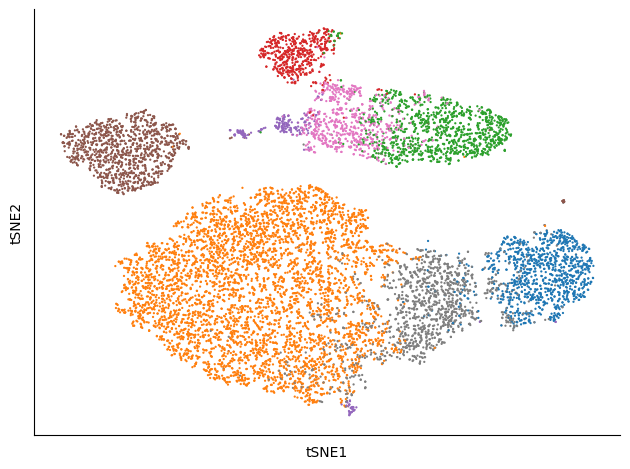

In [28]:
# plot
sc.pl.tsne(adata, color=['cluster'], show=False, legend_loc='none')
# plt.text(1.04, 0.72, 'cluster', transform=plt.gca().transAxes, rotation=0, va='center')

plt.title('')
# plt.xlabel('')
# plt.ylabel('')

plt.tight_layout()

ax = plt.gca()
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)  
# ax.spines['bottom'].set_visible(False)  
# ax.spines['left'].set_visible(False)  
plt.savefig("./figures/Fig3-Ftest-cluster-PBMC-Kang-A.png",dpi=600)
plt.show()

In [16]:
adata.obs["label"]=np.array(label)
adata

AnnData object with n_obs × n_vars = 11432 × 14504
    obs: 'n_counts', 'cluster', 'label'
    uns: 'log1p', 'neighbors', 'umap', 'tsne', 'cluster_colors'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    obsp: 'distances', 'connectivities'

In [17]:
adata.obs["label"]

GAGAAATGCCTATT-1          CD4 T cells
GATTTAGATGCTAG-1          CD8 T cells
GATCTTTGGGACGA-1    FCGR3A+ Monocytes
AATACCCTCGAATC-1              B cells
GTCACAGAACCTTT-1              B cells
                          ...        
ACCGAAACTAGACC-1          CD4 T cells
CGGATAACGTTTCT-1          CD4 T cells
AGCCGGTGATCAGC-1    FCGR3A+ Monocytes
GAGTCAACCACTGA-1          CD4 T cells
CCGAAAACAAACGA-1    FCGR3A+ Monocytes
Name: label, Length: 11432, dtype: object

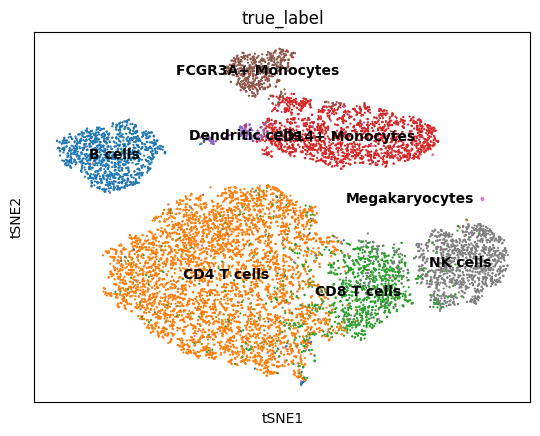

In [18]:
sc.pl.tsne(adata, color=['label'], size=10, legend_loc='on data',title='true_label' ,show=False)
plt.savefig("./figures/true_label.png",dpi=500)